In [389]:
import pandas as pd
# read the data
dataSet=pd.read_csv('insurance.csv')
print(dataSet)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [390]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
# use this library to encode string data tonumbers

dataSet['sex']=encoder.fit_transform(dataSet['sex'])

dataSet['smoker']=encoder.fit_transform(dataSet['smoker'])

dataSet['region']=encoder.fit_transform(dataSet['region'])

# split the data to features and target to apply the regression

x_data=dataSet.drop(['charges'],axis=1).values
y_data=dataSet['charges'].values


print(x_data)
print(y_data)


[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [391]:

# from sklearn.model_selection import train_test_split 
# X_train,X_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [392]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled= scaler.fit_transform(x_data)
x_test_scaled= scaler.transform(x_data)

from sklearn.linear_model import LinearRegression

# apply fit function on the data to get the y_pred of the model (charges)

model=LinearRegression()
model.fit(x_test_scaled, y_data)
y_pred=model.predict(x_test_scaled)

from sklearn.metrics import mean_squared_error,r2_score

# get the score of the data and mean squared error of the model

score=r2_score(y_data,y_pred)
print(score)

mean_square_error=mean_squared_error(y_data,y_pred)
print(mean_square_error)



0.7507372027994937
36527659.88568238


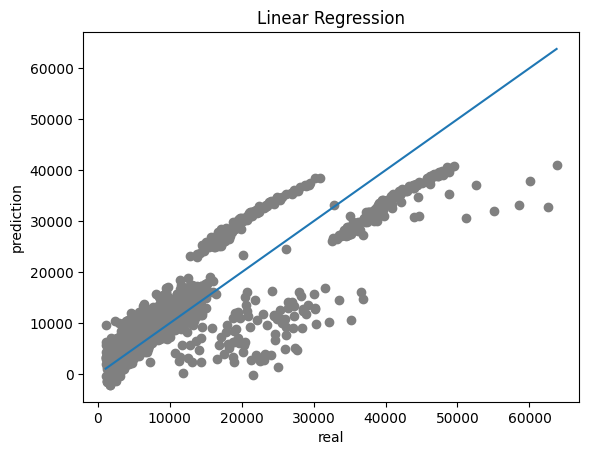

In [393]:
import matplotlib.pyplot as plt
# plot the graph to show how the data is contributed to the equation of the model
plt.scatter(y_data, y_pred, color='gray')
plt.plot([min(y_data), max(y_data)], [min(y_data), max(y_data)])
plt.xlabel('real')
plt.ylabel('prediction')
plt.title('Linear Regression')
plt.show()